ここではscikit-learnを使用した機械学習モデルの基本的な使い方をまとめる

# 目次
1. [scikit-learn内のデータ](#section1)
    - 1.1 [糖尿病データ](#section1-1)
    - 1.2 [ワインのデータ](#section1-2)
2. [データの前処理](#section2)
    - 2.1 [標準化](#section2-1)
    - 2.2 [正規化](#section2-2)
    - 2.3 [ラベルエンコーディング](#section2-3)
    - 2.4 [ワンホットエンコーディング](#section2-4)
    - 2.5 [データ分割](#section2-5)
        - 2.5.1 [Cross-Validation](#section2-5-1)
        - 2.5.2 [Stratified KFold](#section2-5-2)
        - 2.5.3 [Group KFold](#section2-5-3)
        - 2.5.4 [時系列データ分割](#section2-5-3)     
3. [教師あり学習](#section3)
    - 3.1 [線型回帰](#section3-1)
        - 3.1.1 [線型回帰の説明](#section3-1-1)
        - 3.1.2 [単回帰分析](#section3-1-2)
        - 3.1.3 [重回帰分析](#section3-1-3)
    - 3.2 [ロジスティック回帰](#section3-2)
        - 3.2.1 [ロジスティック回帰の説明](#section3-2-1)
        - 3.2.2 [ロジスティック回帰の二値分類](#section3-2-2)
        - 3.2.3 [ロジスティック回帰の多分類](#section3-2-3)
    - 3.3 [ランダムフォレスト](#section3-3)
        - 3.3.1 [ランダムフォレストの説明](#section3-3-1)
        - 3.3.2 [ランダムフォレストの分類問題](#section3-3-2)
        - 3.3.3 [ランダムフォレストの回帰問題](#section3-3-3)
    - 3.4 [サポートベクターマシン](#section3-4)
        - 3.4.1 [サポートベクターマシンの説明](#section3-4-1)
        - 3.4.2 [サポートベクターマシンを用いた分類問題](#section3-4-2)
        - 3.4.3 [ハイパラチューニング(GridSearchCV)](#section3-4-3)
    - 3.5 [K近傍法](#section3-5)
        - 3.5.1 [K近傍法の説明](#section3-5-1)
        - 3.5.2 [K近傍法を用いた分類](#section3-5-2)
        - 3.5.3 [K近傍法を用いた回帰](#section3-5-3)
    - 3.6 [評価方法(分類問題)](#section3-6)
        - 3.6.1 [Accuracy](#section3-6-1)
        - 3.6.2 [ConfusionMatrix(混合行列)](#section3-6-2)
        - 3.6.3 [ClassificationReport](#section3-6-3)
    - 3.7 [評価方法(回帰問題)](#section3-7)
        - 3.7.1 [平均絶対誤差(MAE)](#section3-7-1)
        - 3.7.2 [平均二乗誤差(MSE)](#section3-7-2)
        - 3.7.3 [決定係数](#section3-7-3)

<a id="section1"></a>
## 1. scikit-learn内のデータ

<a id="section1-1"></a>
### 1.1 糖尿病データ

In [3]:
# scikit-learnでは実験用のデータセットがAPIとして搭載されている
# 糖尿病の診断データを使用

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [4]:
print(type(diabetes))
print('説明変数のデータ数：',diabetes.data.shape)    # 説明変数のデータ
print('説明変数のデータの種類：',type(diabetes.data))
print('目的変数のデータ数：',diabetes.target.shape)    # 目的変数のデータ
print('目的変数のデータの種類：',type(diabetes.target))
print('カラム名：',diabetes.feature_names)    # カラム
print('カラム名の種類',type(diabetes.feature_names))

<class 'sklearn.utils._bunch.Bunch'>
説明変数のデータ数： (442, 10)
説明変数のデータの種類： <class 'numpy.ndarray'>
目的変数のデータ数： (442,)
目的変数のデータの種類： <class 'numpy.ndarray'>
カラム名： ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
カラム名の種類 <class 'list'>


In [5]:
# 全データがnumpy.ndarray形式、見にくいのでDataFrame型に変換
import pandas as pd

df_diabetes = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [6]:
# targetをdfに追加
df_diabetes['target'] = diabetes.target
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [7]:
# 最初の8行を表示
df_diabetes.head(8)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0


<a id="section1-2"></a>
### 1.2 ワインのデータ

In [8]:
from sklearn.datasets import load_wine
wine = load_wine()

In [9]:
# DataFrameに変換
df_wine = pd.DataFrame(data = wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [10]:
# 詳細を見てみる
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [11]:
type(df_wine['target'])

pandas.core.series.Series

In [12]:
# targetの種類を把握、3種類か
print(f'列の種類は{type(df_wine["target"])}')
print(df_wine['target'].value_counts())

列の種類は<class 'pandas.core.series.Series'>
target
1    71
0    59
2    48
Name: count, dtype: int64


<a id="section2"></a>
## ２. データの前処理

<a id="section2-1"></a>
### 2.1 標準化

標準化：平均０，標準偏差１にスケーリング<br>
NN分野では標準化しないとモデル制度が落ちることもある．機械は数値の単位を考慮できないから．

In [13]:
# df_wineに標準化を適応．変化をtotal_phenols(総フェノール量)で確認
df_wine.describe()['total_phenols']    # 平均2.29で標準偏差0.62くらいか...

count    178.000000
mean       2.295112
std        0.625851
min        0.980000
25%        1.742500
50%        2.355000
75%        2.800000
max        3.880000
Name: total_phenols, dtype: float64

In [14]:
# データの標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df_wine) # データの適応
df_wine_sc = pd.DataFrame(sc.transform(df_wine), columns = df_wine.columns)    # sc.transformだけだとnp.ndarray配列
df_wine_sc.describe()['total_phenols']    # うまく標準化できてそう

count    178.000000
mean       0.000000
std        1.002821
min       -2.107246
25%       -0.885468
50%        0.095960
75%        0.808997
max        2.539515
Name: total_phenols, dtype: float64

<a id="section2-2"></a>
### 2.2 正規化

正規化：特徴量の値をあらかじめ決めた範囲に収めるようにスケーリング

In [15]:
# ワインのデータを用いて正規化を行う
# ワインデータの最小、最大値を確認
df_wine.describe().loc[['min', 'max']]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
min,11.03,0.74,1.36,10.6,70.0,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.0,0.0
max,14.83,5.80,3.23,30.0,162.0,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.0,2.0


In [16]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler((-1, 1)) # -1から1の範囲に調整
ms.fit(df_wine)
df_wine_ms = pd.DataFrame(ms.transform(df_wine), columns=df_wine.columns)
df_wine_ms.describe().loc[['min','max']]    # 確かに-1から1の範囲で正規化されている

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
min,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<a id="section2-3"></a>
### 2.3 ラベルエンコーディング

ラベルエンコード: カテゴリ変数を数値にエンコードする

In [17]:
df = pd.DataFrame({'野菜名': ['キャベツ', 'レタス', 'ネギ', 'ネギ', 'ネギ', 'キャベツ'], '値段': ['100', '140', '120', '200', '80', '50']})
df

,野菜名,値段
0,キャベツ,100
1,レタス,140
2,ネギ,120
3,ネギ,200
4,ネギ,80
5,キャベツ,50


In [18]:
# ラベルエンコード
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()   # インスタンス化
le.fit(df['野菜名'])  # エンコードしたいカラムをfit

LabelEncoder()

In [19]:
df['野菜名'] = le.transform(df['野菜名'])
df   # エンコードされている

,野菜名,値段
0,0,100
1,2,140
2,1,120
3,1,200
4,1,80
5,0,50


In [20]:
# 訓練データに含まれるユニークなクラスラベルとそのタイプがわかる
le.classes_

array(['キャベツ', 'ネギ', 'レタス'], dtype=object)

In [21]:
# 値段の方もラベルエンコーディングしてみる
le = LabelEncoder()
le.fit(df['値段'])
df['値段'] = le.transform(df['値段'])
df

,野菜名,値段
0,0,0
1,2,2
2,1,1
3,1,3
4,1,5
5,0,4


In [22]:
# 確かに昇順になって、ラベルエンコーディングされている
le.classes_

array(['100', '120', '140', '200', '50', '80'], dtype=object)

<a id="section2-4"></a>
### 2.4 ワンホットエンコーディング

ワンホットエンコーディング: カテゴリ変数を多次元ベクトルで0, 1のみを用いて表す方法

In [23]:
df = pd.DataFrame({'野菜名': ['キャベツ','レタス','ネギ','ネギ','ネギ','キャベツ']})
df

,野菜名
0,キャベツ
1,レタス
2,ネギ
3,ネギ
4,ネギ
5,キャベツ


In [24]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)    # sparseをTrue(デフォルト)にすると疎行列が返される.疎行列は０の要素を持つ大きな行列を効率的に格納するためのデータ構造で、非ゼロの要素とその位置のみを格納する。
# sparseをFalseにすると単純なnumpy.ndarrayが返る

In [25]:
enc.fit_transform(df)
# 単純なnumpy配列になっていることがわかる

/Users/akiyoshi-n/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [26]:
# このように、インスタンス.categories_でエンコーディングする時のラベルを取得できる
enc.categories_

[array(['キャベツ', 'ネギ', 'レタス'], dtype=object)]

In [27]:
df = pd.DataFrame(enc.fit_transform(df), columns=enc.categories_) # カラム名を指定することでDataFrameに変換できる
df

/Users/akiyoshi-n/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,キャベツ,ネギ,レタス
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0


<a id="section2-5"></a>
### 2.5 データ分割

#### 基本のデータ分割

In [28]:
# 今回は糖尿病のデータを使用する
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()    # diabetesは辞書型
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [29]:
df_diabetes.shape

(442, 10)

In [30]:
from sklearn.model_selection import train_test_split
# データをtrain用とtest用で分割する
train_data, test_data = train_test_split(df_diabetes, train_size=0.6, random_state=0)
# shuffleという引数がある。これをFalseにするとシャッフルじゃなくなる
print(train_data.shape)
print(test_data.shape)

(265, 10)
(177, 10)


In [31]:
# しっかりとシャッフルされていることがわかる
train_data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
191,-0.005515,0.050680,-0.041774,-0.043542,-0.079998,-0.076156,-0.032356,-0.039493,0.010227,-0.009362
116,0.048974,0.050680,0.058463,0.070072,0.013567,0.020607,-0.021311,0.034309,0.022004,0.027917
168,0.001751,0.050680,0.059541,-0.002228,0.061725,0.063195,-0.058127,0.108111,0.068986,0.127328
367,-0.009147,0.050680,0.170555,0.014987,0.030078,0.033759,-0.021311,0.034309,0.033654,0.032059
120,-0.049105,-0.044642,0.004572,0.011544,-0.037344,-0.018537,-0.017629,-0.002592,-0.039809,-0.021788
...,...,...,...,...,...,...,...,...,...,...
323,0.070769,0.050680,-0.007284,0.049415,0.060349,-0.004445,-0.054446,0.108111,0.129021,0.056912
192,0.056239,0.050680,-0.030996,0.008101,0.019070,0.021233,0.033914,-0.039493,-0.029526,-0.059067
117,0.059871,-0.044642,-0.021295,0.087287,0.045213,0.031567,-0.047082,0.071210,0.079122,0.135612
47,-0.078165,-0.044642,-0.073030,-0.057313,-0.084126,-0.074277,-0.024993,-0.039493,-0.018114,-0.083920


In [32]:
# 目的変数と説明変数のどちらのデータもtrainデータとtestデータに分割する
X_train, X_test, y_train, y_test = train_test_split(df_diabetes, diabetes.target, train_size=0.6, random_state=0)

In [33]:
# このようにどちらも分割されていることが分かる
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(265, 10)
(177, 10)
(265,)
(177,)


<a id="section2-5-1"></a>
#### 2.5.1 Cross-Validation

Cross-Validation：データを複数回順番に分割し、モデルの精度を評価する方法

In [34]:
# 上のやり方ではテストデータを学習させることなく学習が終わってしまう。
# 糖尿病データ使用

from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=0)
for fold, (train_index, test_index) in enumerate(kf.split(diabetes.data, diabetes.target)):    # enumerate関数は何周目かを出す。下に具体例あり
    # kf.splitの引数にxとyを入れているが、yはなくても良い。しかし、分かりやすさから載せることが多い
    print(f'Fold:{fold} len(train_index):{len(train_index)} len(test_index):{len(test_index)}')

Fold:0 len(train_index):294 len(test_index):148
Fold:1 len(train_index):295 len(test_index):147
Fold:2 len(train_index):295 len(test_index):147


In [35]:
# このようにtestデータのindexはバラバラになっていて1/3の量になっている
test_index

array([  0,   9,  11,  23,  25,  28,  31,  32,  36,  38,  39,  41,  42,
        43,  47,  48,  50,  53,  57,  58,  62,  69,  70,  72,  77,  80,
        82,  84,  86,  87,  88,  91,  94,  95,  98,  99, 105, 115, 117,
       119, 121, 123, 125, 127, 128, 130, 131, 143, 147, 148, 151, 163,
       165, 169, 172, 174, 177, 178, 180, 182, 183, 184, 185, 187, 192,
       193, 195, 197, 201, 202, 203, 207, 209, 211, 222, 227, 242, 243,
       244, 251, 256, 257, 258, 262, 265, 266, 267, 270, 273, 275, 277,
       279, 280, 285, 286, 288, 290, 291, 292, 294, 304, 305, 307, 314,
       321, 323, 324, 331, 333, 334, 335, 337, 338, 341, 351, 352, 354,
       356, 358, 359, 368, 370, 377, 379, 383, 384, 385, 390, 392, 394,
       395, 396, 398, 402, 404, 406, 408, 409, 410, 413, 420, 423, 425,
       426, 428, 429, 440])

In [36]:
# enumerate関数の具体例、下ように(取り出す番号, 取り出すもの)のようになる
aaa = 'あいう'
print(list(enumerate(aaa)))
for x in enumerate(aaa):
    print(x)
for fold, x in enumerate(aaa):
    print(fold, x)

[(0, 'あ'), (1, 'い'), (2, 'う')]
(0, 'あ')
(1, 'い')
(2, 'う')
0 あ
1 い
2 う


In [37]:
aaa = 'あいう'
bbb = 'かきく'
for fold, x in enumerate(zip(aaa, bbb)):
    print(fold)
    print(x)

0
('あ', 'か')
1
('い', 'き')
2
('う', 'く')


<a id="section2-5-2"></a>
#### 2.5.2 Stratified KFold

In [38]:
# ここでは層化K分割交差検証についてまとめる
# 目的変数の数に偏りがあった場合に目的変数のクラス割合を担保しながらデータ分析を行う
# ワインのデータを使用
df_wine['target'].value_counts(normalize = True) # デフォルトはFalseで個数を返すが、Trueにすると割合を返す
# このようにワインのtargetの割合はこのようになっておりクラス1が最も大きいことが分かる

target
1    0.398876
0    0.331461
2    0.269663
Name: proportion, dtype: float64

In [39]:
# 全クラスいい感じで分割されていることが分かる
# クラス数が多い場合やクラス割合が極端に不均一な場合はStratified KFoldを使用する
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
for fold, (train_index, test_index) in enumerate(kf.split(wine.data, wine.target)):
    print(f'FOLD{fold}')
    print(df_wine.iloc[train_index]['target'].value_counts(True))

FOLD0
target
1    0.398305
0    0.330508
2    0.271186
Name: proportion, dtype: float64
FOLD1
target
1    0.403361
0    0.327731
2    0.268908
Name: proportion, dtype: float64
FOLD2
target
1    0.394958
0    0.336134
2    0.268908
Name: proportion, dtype: float64


<a id="section2-5-3"></a>
#### 2.5.3 Group KFold

グループ付き交差検証: データを分割する際に学習データとテストデータに同じグループが現れないように分ける方法

In [40]:
from sklearn.model_selection import GroupKFold

df = pd.DataFrame([[1, 2], [3, 4], [5, 6], [7, 8]], columns=['col1', 'col2'])
df['target'] = [1,2,3,4]
df['group'] = [0, 0, 2, 2]
df

,col1,col2,target,group
0,1,2,1,0
1,3,4,2,0
2,5,6,3,2
3,7,8,4,2


In [46]:
kf = GroupKFold(n_splits=2)
for fold, (train_index, test_index) in enumerate(kf.split(df[['col1', 'col2']], df['target'], df['group'])):
    print(f'FOLD{fold}')
    print(df.iloc[train_index]['group'].value_counts(True))
# 訓練データに他のグループのデータが含まれていないことが分かる

FOLD0
group
0    1.0
Name: proportion, dtype: float64
FOLD1
group
2    1.0
Name: proportion, dtype: float64


<a id="section2-5-4"></a>
#### 2.5.4 時系列データ分割(TimeSeriesSplit)

過去のデータを用いて未来を予測する<br>
具体例: n_split=3の時，データを4つに分割する(0~3)<br>
(train, test)の組み合わせを<br>
(0, 1)<br>
([0,1], 2)<br>
([0,1,2], 3)<br>
のようにして3つの精度を出すことができる

In [50]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


<a id="section3"></a>
## 3. 教師あり学習

<a id="section3-1"></a>
### 3.1 線型回帰 LinearRegression

<a id="section3-1-1"></a>
#### 3.1.1 線型回帰の説明

目的変数yと説明変数の線形関係をモデル化したもの．<br>
説明変数が1つの場合単回帰，複数のものを重回帰と言う<br>
単回帰： y = w0 + w1x のようになる<br>
データ分析の場合, 線型回帰は基本，重回帰分析が使用される<br>

LinearRegression()の引数<br>
fit_intercept: Falseの場合，切片を求める計算を含まない（デフォルトTrue）<br>
normalize: Trueの場合説明変数を正規化（デフォルトFalse）<br>
copy_X: メモリ内でデータ複製するか(デフォルトTrue)<br>
n_jobs: 計算に使うジョブの数<br>

sklearn.linear_model.LinearRegressionクラスのメソッド<br>
fit(X, y): 学習の実行<br>
get_params(): パラメータ取得<br>
predict(): 予測の実行<br>
score(): 決定係数の算出<br>
set_params(): パラメータの設定<br>

<a id="section3-1-2"></a>
#### 3.1.2 単回帰分析

In [128]:
# 単回帰分析
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target

In [125]:
# 説明変数をbmiだけにして単回帰分析を行う
from sklearn.linear_model import LinearRegression
clf = LinearRegression()   # インスタンス化
# bmiのデータを縦ベクトルにして入手
X = df_diabetes['bmi'].values.reshape(-1, 1) # -1は行数を自動で調整するという意味．1は列数を1にするという意味
# 目的変数のtarget
Y = df_diabetes['target'].values
# 予測モデルを作成
clf.fit(X, Y)

LinearRegression()

In [126]:
# 回帰係数
print(f'回帰係数：{clf.coef_}')
# 切片
print(f'切片：{clf.intercept_}')

回帰係数：[949.43526038]
切片：152.13348416289617


In [50]:
# つまり単回帰分析の式は下のようになる
# target = 949.43526038 × bmi + 152.133484

In [130]:
# trainデータとtestデータを8:2で分割し精度を決定係数で評価
# df_diabetesのbmiを説明変数、targetを目的変数として使用
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = df_diabetes['bmi'].values.reshape(-1, 1) # -1は行数を自動で調整するという意味．1は列数を1にするという意味
Y = df_diabetes['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=0) # trainデータとtestデータを8:2で分割
clf = LinearRegression() # インスタンス化
clf.fit(X_train, y_train) # 学習
y_pred = clf.predict(X_test) # 予測
print(f'決定係数：{r2_score(y_test, y_pred)}')


決定係数：0.19057346847560108


<a id="section3-1-3"></a>
#### 3.1.3 重回帰分析

In [51]:
# 重回帰ではどの変数がどの程度目的変数に影響しているかを偏回帰係数の大きさを比較することで分かる
clf = LinearRegression()
# 説明変数
X = df_diabetes[diabetes.feature_names].values
Y = df_diabetes['target'].values
clf.fit(X, Y)
# 回帰係数
print(clf.coef_)
# 切片
print(clf.intercept_)

[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
152.13348416289597


In [52]:
print(X.shape)
print(Y.shape)

(442, 10)
(442,)


In [53]:
# 標準化した値と比較してみる
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df_diabetes[diabetes.feature_names]) # データの適応
X = pd.DataFrame(sc.transform(df_diabetes[diabetes.feature_names]), columns = diabetes.feature_names)    # sc.transformだけだとnp.ndarray配列
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000,4.420000e+02
mean,-8.037814e-18,2.290777e-16,2.009453e-17,-1.607563e-17,8.037814e-18,4.018907e-18,-4.018907e-18,2.330966e-16,0.000000,-4.018907e-17
std,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133e+00,1.001133,1.001133e+00
min,-2.254290e+00,-9.385367e-01,-1.897929e+00,-2.363050e+00,-2.665411e+00,-2.430626e+00,-2.150883e+00,-1.606102e+00,-2.651040,-2.896390e+00
25%,-7.841722e-01,-9.385367e-01,-7.196249e-01,-7.706500e-01,-7.200196e-01,-6.382488e-01,-7.382960e-01,-8.303008e-01,-0.698949,-6.975491e-01
50%,1.131724e-01,-9.385367e-01,-1.531324e-01,-1.192138e-01,-9.084100e-02,-8.029125e-02,-1.384305e-01,-5.449919e-02,-0.040937,-2.265729e-02
75%,8.005001e-01,1.065488e+00,6.569519e-01,7.493678e-01,5.961931e-01,6.274425e-01,6.162390e-01,7.213025e-01,0.681851,5.869224e-01
max,2.327895e+00,1.065488e+00,3.585718e+00,2.776058e+00,3.235851e+00,4.179278e+00,3.809072e+00,3.894331e+00,2.808722,2.851075e+00


In [54]:
# 重回帰ではどの変数がどの程度目的変数に影響しているかを偏回帰係数の大きさを比較することで分かる
clf = LinearRegression()
# 説明変数
X = X.values
Y = df_diabetes['target'].values
clf.fit(X, Y)
# 回帰係数
print(clf.coef_)
# 切片
print(clf.intercept_)

[ -0.47612079 -11.40686692  24.72654886  15.42940413 -37.67995261
  22.67616277   4.80613814   8.42203936  35.73444577   3.21667372]
152.13348416289594


<a id="section3-2"></a>
### 3.2  ロジスティック回帰 LogisticRegression

<a id="section3-2-1"></a>
#### 3.2.1 ロジスティック回帰の説明

名前に回帰とついているが実は分類モデルである<br>
ベルヌーイ分布に従う変数の統計的回帰モデルの一つ<br>
ベルヌーイ分布とは成功か，失敗かのような2種類のみの結果しか得られないような実験，試行（ベルヌーイ試行）の結果を0と1で表した分布<br>
ロジスティック回帰とはシグモイド関数を使って，事象が起こる確率を0から1の範囲で算出（出力が0〜1になる関数）<br>
二値分類では出力された確率を事象が起こる確率として考えれる<br>

LogisticRegression()の引数<br>
penalty:ペナルティ関数の設定(l1：L1正則化，l2：L2正則化)<br>
C：正則化の影響度の設定<br>
random_state：乱数<br>
solver：最適化のアルゴリズム(newtoncg', 'lbfgs', 'liblinear', 'sag', 'saga')<br>
max_iter：収束計算の最大試行回数<br>
n_jobs：計算に使うジョブの数<br>

sklearn.linear_model.LogisticRegressionクラスのメソッド<br>
fit():学習の実行<br>
get_params():学習の際に用いたパラメータの取得<br>
predict(): 予測の実行<br>
predict_proba(): 予測の実行(確率値)<br>
score(): 決定係数の算出<br>
set_params(**params): パラメータの設定

<a id="section3-2-2"></a>
#### 3.2.2 ロジスティック回帰の二値分類

In [55]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
# 乳がんのデータセット
breast = load_breast_cancer()
df_breast = pd.DataFrame(data=breast.data, columns=breast.feature_names)
df_breast['target'] = breast.target

In [56]:
df_breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [57]:
# 乳がんのデータセットは悪性腫瘍[0], 良性腫瘍[1]かを分類することが可能なデータセット
df_breast['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [58]:
# trainデータとtestデータを分割し，精度出す
# インスタンス作成
# liblinearは比較的小さいデータセットに対して用いるsolber
clf = LogisticRegression(solver='liblinear')
# 説明変数
X = df_breast[breast.feature_names].values
Y = df_breast['target'].values

In [59]:
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [60]:
# trainデータとtestデータで分割
# 目的変数と説明変数のどちらのデータもtrainデータとtestデータに分割する
# この場合shuffleのデフォルトはTrueであるため再現性ない
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [61]:
# 予測モデル作成
clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [62]:
# testデータの予測
y_prediction = clf.predict(X_test)

In [63]:
# testデータの予測値
y_prediction_proba = clf.predict_proba(X_train)

In [64]:
from sklearn.metrics import accuracy_score
# 精度算出
accuracy_score(y_test, y_prediction)

0.956140350877193

<a id="section3-2-3"></a>
#### 3.2.3 ロジスティック回帰の多分類

In [65]:
# ワインのデータ使用
df_wine['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [66]:
# インスタンス作成
clf = LogisticRegression(solver='liblinear')
# 説明変数
X = df_wine[wine.feature_names].values
# 目的変数
Y = df_wine['target'].values
# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# 予測モデル作成
clf.fit(X_train, y_train)
# 精度算出
print(accuracy_score(y_test, clf.predict(X_test)))

0.9444444444444444


<a id="section3-3"></a>
### 3.3 ランダムフォレスト

<a id="section3-3-1"></a>
#### 3.3.1 ランダムフォレストの説明

ランダムフォレストとは決定木を弱学習器とする集団学習アルゴリズムの一つ<br>
弱学習器とは弱い学習器で，予測精度の低い手法のことである．<br>
集団学習とは精度が高くない複数の結果を組み合わせることで精度を上げる機械学習方法の１つ<br>
ランダムフォレストは複数の異なる決定木をまとめた大きな一つの学習器．<br>
決定木は過学習に陥りやすいという欠点があったが複数使用することでこの問題を解消した．<br>
分類問題では多数決，回帰問題では平均値などの代表値を使用する．<br>
似たような意見を持つ決定木の多数決や平均値をとっても精度は上がらない．そこでそれぞれ異なるデータで決定木を作成することで木の多様性を保つ<br>
個別に取り出したデータで決定木を作成．この時，決定木の一つ一つの説明変数をランダムに設定することで異なる形状の決定木を作成する．<br>
重要なパラメータ：n_estimatorsで使用する決定木の数<br>
決定木が少ないと過学習が起こる．大きすぎると精度が上がらない．


分類ではRandomForestClassifier<br>
回帰ではRandomForestRegressorを使用

RandomForestClassifier, Regressorの主要な引数（他にもあり）<br>
n_estimators：決定木の個数<br>
criterion：決定木のデータ分割の指標('gini-cg', 'entropy'）(デフォルトはgini)<br>
max_depth：決定木の深さの最大値を指定<br>
n_jobs：計算に使うジョブの数<br>
random_state：乱数<br>
verbose：モデル構築の過程のメッセージを出すかどうか（デフォルトは0）

RandomForest独自のメソッド<br>
feature_importances_: 説明変数の特徴量重要度<br>
学習した際にどの特徴量が効いたかを定量的に出せる．

<a id="section3-3-2"></a>
#### 3.3.2 ランダムフォレストの分類問題

In [67]:
# 乳がんのデータを使用する
breast = load_breast_cancer()
df_breast = pd.DataFrame(data=breast.data, columns=breast.feature_names)
df_breast['target'] = breast.target

In [103]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
# 説明変数
X = df_breast[breast.feature_names].values
Y = df_breast['target'].values
# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# モデル作成
clf.fit(X_train, y_train)
# 精度算出
accuracy_score(y_test, clf.predict(X_test))

0.9649122807017544

<Axes: >

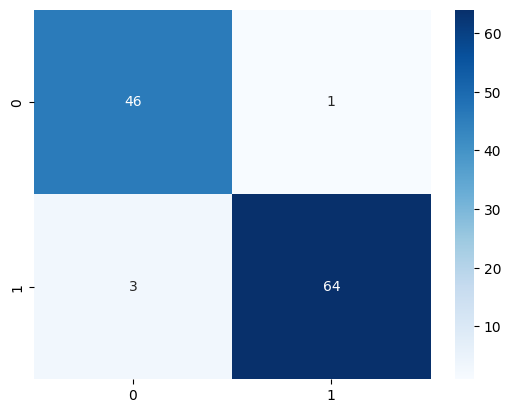

In [105]:
# confusion matrixで混同行列を作成する

import seaborn as sns
from sklearn.metrics import confusion_matrix
# 予測値
y_pred = clf.predict(X_test)
# 混同行列
cm = confusion_matrix(y_test, y_pred)
# ヒートマップの作成
sns.heatmap(cm, annot=True,cmap='Blues')
# 結構しっかりと予測できていることがわかる

In [69]:
# 特徴量重要度を算出．今回の特徴量は30個
clf.feature_importances_

array([0.03699612, 0.01561296, 0.06016409, 0.0371452 , 0.0063401 ,
       0.00965994, 0.0798662 , 0.08669071, 0.00474992, 0.00417092,
       0.02407355, 0.00548033, 0.01254423, 0.03880038, 0.00379521,
       0.00435162, 0.00452503, 0.00556905, 0.00610635, 0.00528878,
       0.09556258, 0.01859305, 0.17205401, 0.05065305, 0.00943096,
       0.01565491, 0.02443166, 0.14202709, 0.00964898, 0.01001304])

In [70]:
# 特徴量重要度をDataFrame形式に変え，重要度が高い説明変数５つを抽出
# DataFrame型にsort_valuesメソッドを使うことで特徴量重要度を降順に並べ替えることができる
# ascending=Falseにすることで降順
feature_importance = pd.DataFrame({'feature':breast.feature_names, 'importances': clf.feature_importances_}).sort_values(by='importances', ascending=False)
feature_importance.head()

,feature,importances
22,worst perimeter,0.172054
27,worst concave points,0.142027
20,worst radius,0.095563
7,mean concave points,0.086691
6,mean concavity,0.079866


<a id="section3-3-3"></a>
#### 3.3.3 ランダムフォレストの回帰問題

In [71]:
# 糖尿病のデータを使用
from sklearn.ensemble import RandomForestRegressor
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target

# インスタンス作成
clf = RandomForestRegressor(random_state=0)

# 説明変数
X = df_diabetes[diabetes.feature_names].values

# 目的変数target
Y = df_diabetes['target'].values

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

# 予測モデルを作成
clf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

<Axes: xlabel='importances', ylabel='feature'>

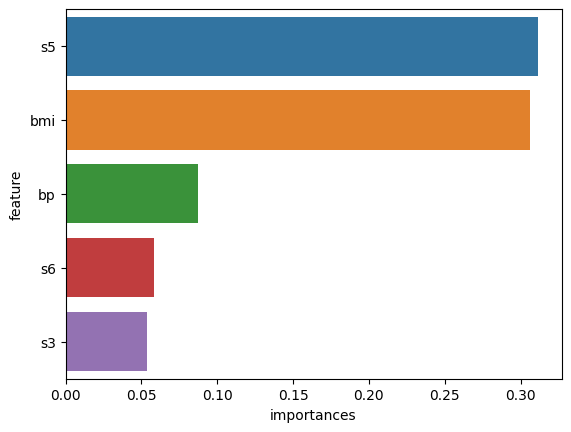

In [72]:
# 特徴量重要度を可視化(seabornライブラリを使用)
import matplotlib.pyplot as plt
import seaborn as sns
# 特徴量重要度
feature_importance = pd.DataFrame({'feature':diabetes.feature_names, 'importances': clf.feature_importances_}).sort_values(by='importances', ascending=False)
# 可視化
sns.barplot(x='importances', y='feature', data=feature_importance.head())

<a id="section3-4"></a>
### 3.4 サポートベクターマシン

<a id="section3-4-1"></a>
#### 3.4.1 サポートベクターマシンの説明

教師あり学習を用いるパターン認識モデルの一つ<br>
SVMと呼ばれ，クラスを明確に分ける境界線を引くための手法<br>
マージン最大化と呼ばれる方法で境界線を推定

2種類の正解ラベルがあるデータに対して境界線を引く際に，学習データの中で最も境界線に近いものと決定境界との距離をマージンとする．<br>マージン最大化ではそのマージンが最大になる境界線を得ようとする．

scikit-learnにはさまざまなタイプのSVMが実装されている．<br>
分類問題に使用するSVM<br>
・SVC: 標準的なソフトマージン(エラーを許容する)SVM<br>
・LinearSVC: カーネルが線形カーネルの場合に特化したSVM<br>
・NuSVC: エラーを許容する表現が異なるSVM<br>
回帰問題に使用するSVM<br>
・SVR<br>
・LinearSVR<br>
・NuSVR<br>
異常検知に使用するSVM<br>
・OneClassSVM

今回はSVCを使用する<br>
SVC()の引数<br>
C:正則化のパラメータ<br>
kernel:アルゴリズムで使用するカーネルタイプ（'linear'，'poly'，'rbf'，'sigmoid'，'precomputed'）<br>
degree: 多項式カーネル関数の次数（kernel='poly'の時のみ有効）<br>
gamma: カーネルがrbf、poly、sigmoidの時のカーネル係数<br>
random_state: 乱数<br>
verbose: モデル構築の過程のメッセージを出すかどうか(デフォルトは0)<br>

<a id="section3-4-2"></a>
#### 3.4.2 サポートベクターマシンを用いた分類問題

In [83]:
from sklearn.svm import SVC
import numpy as np
# 乳がんデータ使用，df_breast
# インスタンス形成
clf = SVC(random_state=0)
#変数
X = df_breast[breast.feature_names].values
Y = df_breast['target'].values
# データ分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# モデル作成
clf.fit(X_train, y_train)
# 精度
print(accuracy_score(y_test,clf.predict(X_test)))

0.9298245614035088


<a id="section3-4-3"></a>
#### 3.4.3 ハイパラチューニング(GridSearchCV)

In [84]:
# 精度がそんなに高くないのでパラメータチューニングを行なって精度を上げてみる
from sklearn.model_selection import GridSearchCV
import numpy as np
# GridSearchはチューニングしたいパラメータと範囲を辞書形式で指定
# 範囲を細かく指定すると探索時間は結構かかる
params = {
    'C': np.arange(0.1,1.0,0.05),
    'kernel': ['rbf'],
    'gamma': np.arange(0.1,1,0.5)
}

In [85]:
# 対象のインスタンス，探索パラメータ，スコア，データ分割数(クロスバリデーション)
clf = GridSearchCV(clf, params, scoring='accuracy', cv=4)
# パラメータチューニング
clf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=SVC(random_state=0),
             param_grid={'C': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'gamma': array([0.1, 0.6]), 'kernel': ['rbf']},
             scoring='accuracy')

In [86]:
# 最適なパラメータ確認
print(clf.best_params_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


In [87]:
clf1 = SVC(C=0.1, gamma=0.1, kernel='rbf', random_state=0)
clf1.fit(X_train, y_train)
# 精度
print(accuracy_score(y_test,clf1.predict(X_test)))
# うん？精度下がってるぞ

0.5877192982456141


<a id="section3-5"></a>
### 3.5 K近傍法

<a id="section3-5-1"></a>
#### 3.5.1 K近傍法の説明

K近傍法とは特長区間における最も近い訓練例に基づいた分類アルゴリズム<br>
分類や回帰のためのアルゴリズムでK-NNと呼ばれる<br>
似たようなデータをK個集め，それらの多数決から目的とする値を求める<br>
クラス判別方法<br>
1. 学習データを赤と青の丸でプロット
2. Kの数を指定
3. 未知のデータに隣接している点をK個取得
4. 多数決で未知データのクラスを推定

KNeighborsClassifier()、またはのKNeighborsRegressor()の引数<br>
・n_neighbors:近傍オブジェクト数（デフォルトは5）<br>
・weights:重み('uniform', 'distance'）(デフォルトはuniform)<br>
・algorithm: アルゴリズム選択('ball_tree', 'kd_tree' ,'brute' ,'auto'）(デフォルトはauto)<br>
・leaf_size: リーフサイズ（デフォルトは30）<br>
・n_jobs: 計算に使うジョブの数<br>
・verbose: モデル構築の過程のメッセージを出すかどうか（デフォルトは0）

<a id="section3-5-2"></a>
#### 3.5.2 K近傍法を用いた分類

In [89]:
# 乳がんのデータ
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
X = df_breast[breast.feature_names].values
Y = df_breast['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# 予測モデル作成
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.9122807017543859

<a id="section3-5-3"></a>
#### 3.5.3 K近傍法を用いた回帰

In [119]:
from sklearn.neighbors import KNeighborsRegressor

clf = KNeighborsRegressor()
X = df_diabetes[diabetes.feature_names].values
Y = df_diabetes['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# 予測モデル作成
clf.fit(X_train, y_train)
# 精度
y_pred = clf.predict(X_test)

In [115]:
# MAEで評価
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

49.49213483146069


In [120]:
# MSEで評価
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

4243.422022471909


In [121]:
# RMSEで評価
print(np.sqrt(mean_squared_error(y_test, y_pred)))

65.14155373087065


<a id="section3-6"></a>
### 3.6 評価方法（分類問題）

<a id="section3-6-1"></a>
#### 3.6.1 Accuracy

In [96]:
# accuracyの算出(予測データの何割が当たっているか)
from sklearn.metrics import accuracy_score

# 予測ラベル
y_pred = [0, 2, 1, 3]
# 正解ラベル
y_true = [0, 1, 2, 3]

# accuracyの算出
print(accuracy_score(y_true, y_pred)) # 第一引数に正解ラベル，第二引数に予測ラベル
# 2/4正しいため0.5となる．

0.5


<a id="section3-6-2"></a>
#### 3.6.2 ConfusionMatrix(混合行列)

ConfusionMatrix: 実際のクラスと予測したクラスの組み合わせを表にしたもの

2値分類においては実際のクラスと予測したクラスの組み合わせで次の4種類に分けることができる<br>
真陽性（TP: True Positive）: 実際のクラスが陽性で予測も陽性（正解）<br>
真陰性（TN: True Negative）: 実際のクラスが陰性で予測も陰性（正解）<br>
偽陽性（FP: False Positive）: 実際のクラスは陰性で予測が陽性（不正解）<br>
偽陰性（FN: False Negative）: 実際のクラスは陽性で予測が陰性（不正解）<br>

この4種類の算出結果を行列形式にしたものをConfusionMatrix(混合行列)という．

In [99]:
from sklearn.metrics import confusion_matrix

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

cm = confusion_matrix(y_true, y_pred)
print(cm)
# 列が予測，行が正解．0行，0列は予測も正解も陰性であったことを表す．
# 0行0列は1．つまり陰性と予測して実際に陰性だった数は1個であることを表す．
# 0行1列は4．つまり陽性と予測して実際に陰性だった数は4個であることを表す．

[[1 4]
 [3 2]]


<Axes: >

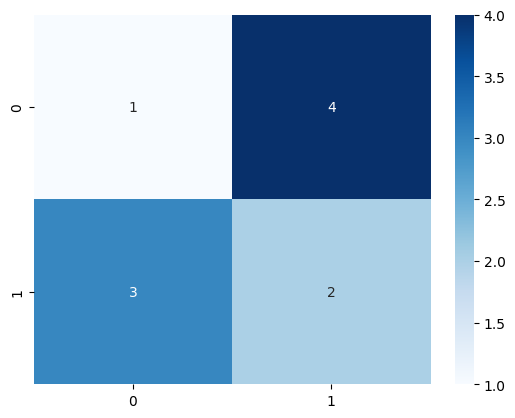

In [101]:
# 混合行列を可視化する
import seaborn as sns
import matplotlib.pyplot as plt
        
# ヒートマップの作成
sns.heatmap(cm, annot=True,cmap='Blues') # annotはannotationのことで数字を表示するかどうか
# cmapはcolor mapの事で色を指定する．今回は青系統で指定

<a id="section3-6-3"></a>
#### 3.6.3 ClassificationReport

ClassificationReport: 分類問題の結果を様々な指標をもとに集計したテキストレポート

In [110]:
from sklearn.metrics import classification_report
        
# 正解ラベル
y_true = [0, 1, 2, 2, 2]        
# 推定ラベル
y_pred = [0, 0, 2, 2, 1]
# 目的変数の各クラス名
target_names = ['class 0', 'class 1', 'class 2']
# 正解ラベル，予測ラベル，クラス名
print(classification_report(y_true, y_pred, target_names=target_names))
# precisionは適合率，recallは再現率，f1-scoreは適合率と再現率の調和平均
# supportは各クラスのデータ数
# 適合率はモデルが出した結果において本当に正解だったものの割合
# 再現率は結果として出てくるべきもののうちモデルが正解と判断したものの割合
# f1-scoreは適合率と再現率をどちらも重視したい時に用いる
# macro avgは各クラスの平均
# weighted avgは各クラスのデータ数で重み付けした平均

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



<a id="section3-7"></a>
### 3.7 評価方法（回帰問題）

<a id="section3-7-1"></a>
#### 3.7.1 平均絶対誤差(MAE)

MeanAbsoluteError(MAE): 誤差の絶対値の平均

In [113]:
from sklearn.metrics import mean_absolute_error

# 正解値
y_true = [3, -0.5, 2, 7]

# 予測値
y_pred = [2.5, 0.0, 2, 8]
print(mean_absolute_error(y_true, y_pred))


0.5


<a id="section3-7-2"></a>
#### 3.7.2 平均二乗誤差(MSE)

MeanSquaredError(MSE): 予測値との誤差の2乗を平均したもの

In [116]:
from sklearn.metrics import mean_squared_error
# 正解値
y_true = [3, -0.5, 2, 7]

# 予測値
y_pred = [2.5, 0.0, 2, 8]
print(mean_squared_error(y_true, y_pred))

0.375


RMSE: MSEの平方根を取ったもの(よく使われる)<br>
実装されていないため自分で実装する必要あり

In [118]:
import numpy as np
# 正解値
y_true = [3, -0.5, 2, 7]

# 予測値
y_pred = [2.5, 0.0, 2, 8]
print(np.sqrt(mean_squared_error(y_true, y_pred)))

0.6123724356957945


<a id="section3-7-3"></a>
#### 3.7.3 決定係数

R<sup>2</sup> Score
(決定係数): 説明変数が目的変数をどれだけ説明できるかを表す値で最も当てはまりは良い時は1.0になる．寄与率と言われている．

In [122]:
from sklearn.metrics import r2_score
# 正解値
y_true = [3, -0.5, 2, 7]

# 予測値
y_pred = [2.5, 0.0, 2, 8]

# accuracyの算出
print(r2_score(y_true, y_pred))

0.9486081370449679
